In [60]:
from sklearn.datasets import load_iris
df=load_iris()

In [61]:
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [62]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [63]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [64]:
import pandas as pd
data = pd.DataFrame(df.data,columns=df.feature_names)

In [65]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [66]:
data['target']= df.target
# data['target'] = data['target'].apply(lambda x: df.target_names[x])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [67]:
d0=data[data.target == 0]
d0.shape
d0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [68]:
d1=data[data.target == 1]
d1.shape

(50, 5)

In [69]:
d2=data[data.target == 2]
d2.shape

(50, 5)

Sepal length and sepal width (Setosa and versicolor)

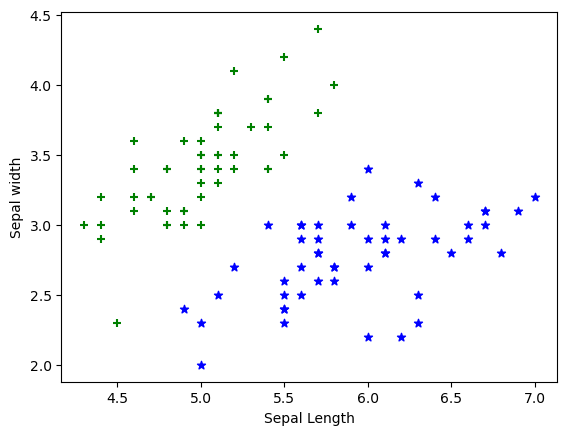

In [70]:
import matplotlib.pyplot as plt

plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.scatter(d0['sepal length (cm)'], d0['sepal width (cm)'],color ='green', marker= '+')
plt.scatter(d1['sepal length (cm)'], d1['sepal width (cm)'],color ='blue', marker= '*')

In [71]:
X = data.drop(['target'], axis=1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [72]:
y=data.target

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=20)

In [74]:
x_train.shape

(120, 4)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors= 5)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [78]:
kn.score(x_test,y_test)

0.9666666666666667

In [85]:
from sklearn.metrics import confusion_matrix
y_pre=kn.predict(x_test)
cm = confusion_matrix(y_test, y_pre)

In [86]:
cm

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

Text(50.722222222222214, 0.5, 'True value')

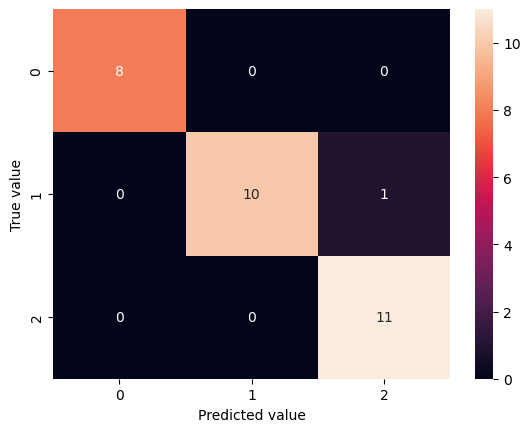

In [88]:

import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted value')
plt.ylabel('True value')

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

